In [1]:
#read all csv's from the folder Save

import pandas as pd
import os
import json
import numpy as np
import matplotlib.pyplot as plt


def read_csvs(path):
    files = os.listdir(path)
    df_target = []
    df_target_y = []
    list_names = []
    for file in files:
        if file.endswith('label_confusion_matrix.csv'):
            df = (pd.read_csv(path + file))
            df_label=(df)
        elif file.endswith('label_result.csv'):  
            df = (pd.read_csv(path + file))
            df_label_y=(df) 
        elif file.endswith('result.csv'): 
            df = (pd.read_csv(path + file))
            df_target_y.append(df)
        elif file.endswith('matrix.csv'):
            # take the name of the file except the last 21 characters so except _confusion_matrix.csv
            list_names.append(file[:-21])
            df = (pd.read_csv(path + file))
            df_target.append(df)
    return df_target, df_label, list_names, df_target_y, df_label_y



df_target,df_label,list_names, df_target_y, df_label_y = read_csvs('Save/')


print(df_target[1].values)

print(df_label)

print(list_names)

print(df_target_y[1].y_pred)

[[1552  462]
 [ 339 1295]]
     0     1    2
0  836   134  203
1  130  1012  366
2  177   281  509
['Gender', 'Miscellaneous', 'Race', 'Religion', 'Sexual Orientation']
0       1
1       1
2       1
3       1
4       1
       ..
3643    0
3644    1
3645    1
3646    0
3647    1
Name: y_pred, Length: 3648, dtype: int64


In [2]:
#print the confusion matrix of the classifier using sklearn

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(df, title,labels):
    #cm = confusion_matrix(y_test, y_pred)
    cm = df.values
    fig, ax = plt.subplots(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt='d',
                xticklabels=labels, yticklabels=labels)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(title)
    plt.show()

#report metrics of the classifier  using sklearn

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

def report_metrics(df,is_labels):
    #y_pred = classifier.predict(X_test)
    y_pred = df.y_pred
    labels = df.y_test
    #get the report of the classifier
    print("Classification report:")
    print(classification_report(labels, y_pred))
    #print accuracy of the classifier
    print("Classification accuracy:")
    print(accuracy_score(labels, y_pred))
    #print Macro F1 score of the classifier
    print("Macro F1 score:")
    print(f1_score(labels, y_pred, average='macro'))
    #print auroc score of the classifier
    print("Classification AUROC:")
    if is_labels:
        proba=np.vstack((df.y_pred_proba1.to_numpy(),df.y_pred_proba2.to_numpy(),df.y_pred_proba3.to_numpy())).transpose()
        print(roc_auc_score(labels,proba, multi_class='ovr'))
    else:
        proba=df.y_pred_proba2.to_numpy()
        print(roc_auc_score(labels,proba))


    





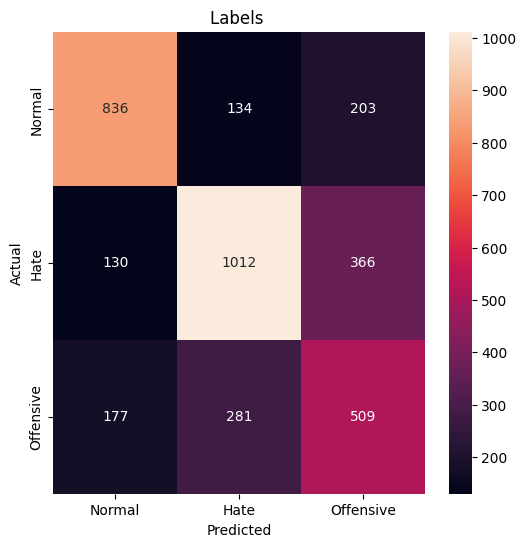

Classification report:
              precision    recall  f1-score   support

           0       0.73      0.71      0.72      1173
           1       0.71      0.67      0.69      1508
           2       0.47      0.53      0.50       967

    accuracy                           0.65      3648
   macro avg       0.64      0.64      0.64      3648
weighted avg       0.65      0.65      0.65      3648

Classification accuracy:
0.6461074561403509
Macro F1 score:
0.6364473525924232
Classification AUROC:
0.8133989616924951


In [3]:

plot_confusion_matrix(df_label, "Labels ",["Normal","Hate","Offensive"])
# convert labels to numbers for the report


df_label_y = df_label_y.replace({'normal': 1, 'hatespeech': 0, 'offensive': 2})

#print(df_label_y)
report_metrics(df_label_y,True)


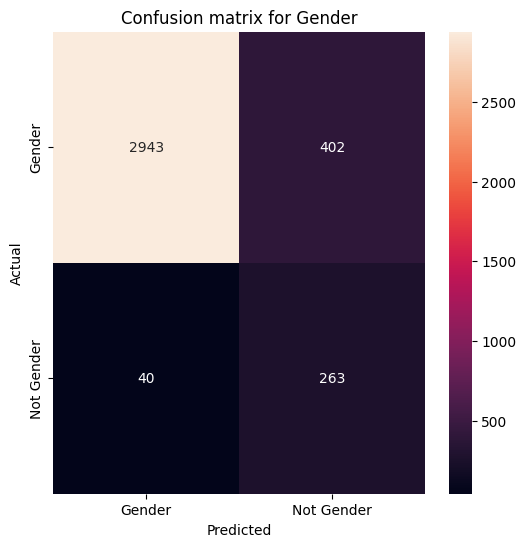

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.88      0.93      3345
           1       0.40      0.87      0.54       303

    accuracy                           0.88      3648
   macro avg       0.69      0.87      0.74      3648
weighted avg       0.94      0.88      0.90      3648

Classification accuracy:
0.8788377192982456
Macro F1 score:
0.7367700682262226
Classification AUROC:
0.9295722397351842


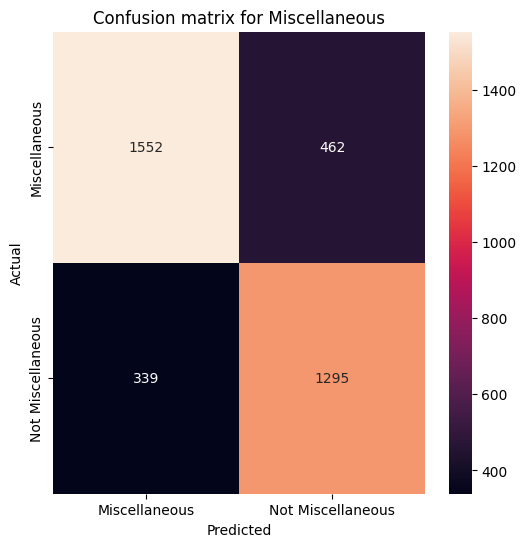

Classification report:
              precision    recall  f1-score   support

           0       0.82      0.77      0.79      2014
           1       0.74      0.79      0.76      1634

    accuracy                           0.78      3648
   macro avg       0.78      0.78      0.78      3648
weighted avg       0.78      0.78      0.78      3648

Classification accuracy:
0.7804276315789473
Macro F1 score:
0.7793324273676159
Classification AUROC:
0.8595816129200858


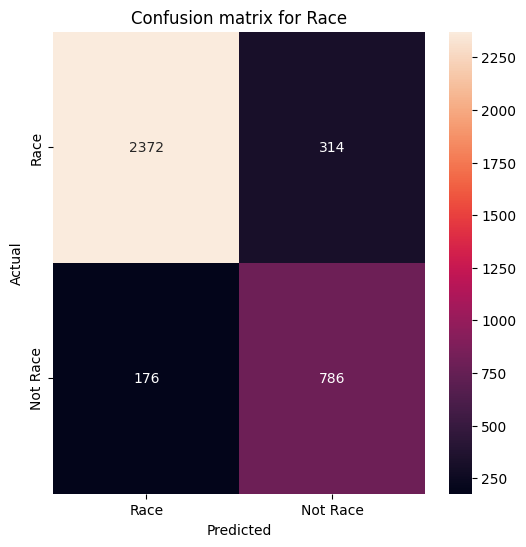

Classification report:
              precision    recall  f1-score   support

           0       0.93      0.88      0.91      2686
           1       0.71      0.82      0.76       962

    accuracy                           0.87      3648
   macro avg       0.82      0.85      0.83      3648
weighted avg       0.87      0.87      0.87      3648

Classification accuracy:
0.8656798245614035
Macro F1 score:
0.8343739935147605
Classification AUROC:
0.9254248950823782


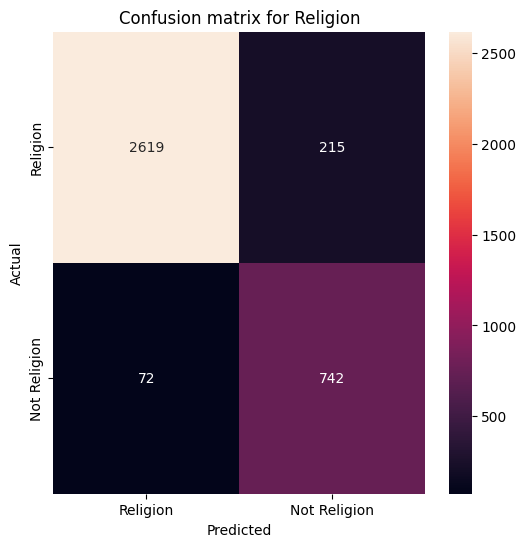

Classification report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.95      2834
           1       0.78      0.91      0.84       814

    accuracy                           0.92      3648
   macro avg       0.87      0.92      0.89      3648
weighted avg       0.93      0.92      0.92      3648

Classification accuracy:
0.9213267543859649
Macro F1 score:
0.8929994813370772
Classification AUROC:
0.9590454796876815


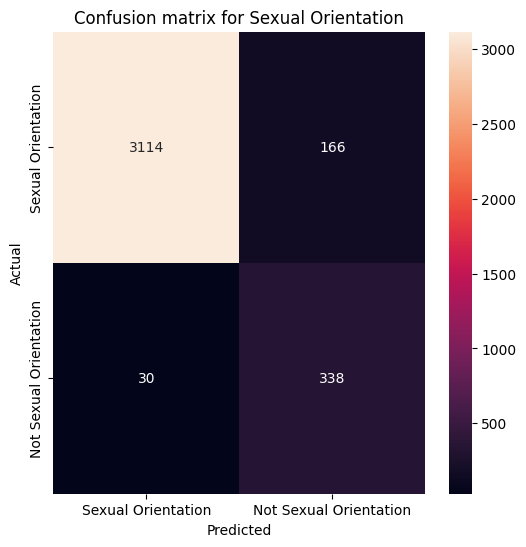

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      3280
           1       0.67      0.92      0.78       368

    accuracy                           0.95      3648
   macro avg       0.83      0.93      0.87      3648
weighted avg       0.96      0.95      0.95      3648

Classification accuracy:
0.9462719298245614
Macro F1 score:
0.8723593862465295
Classification AUROC:
0.9735568001060445


In [4]:
# print confusion matrix for each target
#zip list_names and df_target
for name, df,df_y in zip(list_names, df_target,df_target_y):
    current_title = 'Confusion matrix for ' + name
    labels = [name, "Not "+name] 
    plot_confusion_matrix(df, current_title,labels)
    report_metrics(df_y,False)
